## Import Statements

In [1]:
import pandas as pd

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [3]:
data = pd.read_csv('Programming Lang.csv')

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [4]:
data.head()

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [14]:
data

,m,TagName,Unnamed: 2
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124
...,...,...,...
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [6]:
data.shape

(1991, 3)

**Challenge**: Count the number of entries in each column of the dataframe

In [13]:
data.count()

m             1991
TagName       1991
Unnamed: 2    1991
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [23]:
# total number of posts per language
data.groupby('TagName').sum()

/tmp/ipykernel_31456/2175895399.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby('TagName').sum()


,Unnamed: 2
TagName,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [22]:
 # part 2
s = data.groupby('TagName').count()
smallest = data.groupby('TagName').count().idxmin()
print(s['m'].loc[smallest])

TagName
go    129
go    129
Name: m, dtype: int64


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [5]:
# here we use the function to_date_time() to solve this

In [24]:
data['New_date'] = pd.to_datetime(data['m'])

In [25]:
data

,m,TagName,Unnamed: 2,New_date
0,2008-07-01 00:00:00,c#,3,2008-07-01
1,2008-08-01 00:00:00,assembly,8,2008-08-01
2,2008-08-01 00:00:00,javascript,162,2008-08-01
3,2008-08-01 00:00:00,c,85,2008-08-01
4,2008-08-01 00:00:00,python,124,2008-08-01
...,...,...,...,...
1986,2020-07-01 00:00:00,r,5694,2020-07-01
1987,2020-07-01 00:00:00,go,743,2020-07-01
1988,2020-07-01 00:00:00,ruby,775,2020-07-01
1989,2020-07-01 00:00:00,perl,182,2020-07-01


### new data with correct date format

In [26]:
new_data = data.drop(columns='m')
new_data

,TagName,Unnamed: 2,New_date
0,c#,3,2008-07-01
1,assembly,8,2008-08-01
2,javascript,162,2008-08-01
3,c,85,2008-08-01
4,python,124,2008-08-01
...,...,...,...
1986,r,5694,2020-07-01
1987,go,743,2020-07-01
1988,ruby,775,2020-07-01
1989,perl,182,2020-07-01


## Data Manipulation



# changing the pivot

**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [34]:
new_data = new_data.iloc[:,[2,1,0]]
new_data

,New_date,Unnamed: 2,TagName
0,2008-07-01,3,c#
1,2008-08-01,8,assembly
2,2008-08-01,162,javascript
3,2008-08-01,85,c
4,2008-08-01,124,python
...,...,...,...
1986,2020-07-01,5694,r
1987,2020-07-01,743,go
1988,2020-07-01,775,ruby
1989,2020-07-01,182,perl


## to accomplish that we use the pivot() function in pandas

In [37]:
new_rotation = new_data.pivot(columns='TagName',index='New_date')
new_rotation.head()

Unnamed: 2                                                      \
TagName      assembly      c      c#    c++ delphi  go    java javascript   
New_date                                                                    
2008-07-01        NaN    NaN     3.0    NaN    NaN NaN     NaN        NaN   
2008-08-01        8.0   85.0   511.0  164.0   14.0 NaN   222.0      162.0   
2008-09-01       28.0  321.0  1649.0  755.0  105.0 NaN  1137.0      640.0   
2008-10-01       15.0  303.0  1989.0  811.0  112.0 NaN  1153.0      725.0   
2008-11-01       17.0  259.0  1730.0  735.0  141.0 NaN   958.0      579.0   

                                                   
TagName      perl    php python    r   ruby swift  
New_date                                           
2008-07-01    NaN    NaN    NaN  NaN    NaN   NaN  
2008-08-01   28.0  161.0  124.0  NaN   73.0   NaN  
2008-09-01  131.0  482.0  542.0  6.0  290.0   NaN  
2008-10-01  127.0  617.0  510.0  NaN  249.0   NaN  
2008-11-01   97.0  504.0  452.0  1.0  160.0   NaN

In [38]:
# getting the shape
new_rotation.shape

(145, 14)

In [40]:
new_rotation.count()

            TagName   
Unnamed: 2  assembly      144
            c             144
            c#            145
            c++           144
            delphi        144
            go            129
            java          144
            javascript    144
            perl          144
            php           144
            python        144
            r             142
            ruby          144
            swift         135
dtype: int64

## replcing all the NaN values with a default value(0)

In [43]:
new_rotation.fillna(value=0,inplace=True)
new_rotation.head()

Unnamed: 2                                                       \
TagName      assembly      c      c#    c++ delphi   go    java javascript   
New_date                                                                     
2008-07-01        0.0    0.0     3.0    0.0    0.0  0.0     0.0        0.0   
2008-08-01        8.0   85.0   511.0  164.0   14.0  0.0   222.0      162.0   
2008-09-01       28.0  321.0  1649.0  755.0  105.0  0.0  1137.0      640.0   
2008-10-01       15.0  303.0  1989.0  811.0  112.0  0.0  1153.0      725.0   
2008-11-01       17.0  259.0  1730.0  735.0  141.0  0.0   958.0      579.0   

                                                   
TagName      perl    php python    r   ruby swift  
New_date                                           
2008-07-01    0.0    0.0    0.0  0.0    0.0   0.0  
2008-08-01   28.0  161.0  124.0  0.0   73.0   0.0  
2008-09-01  131.0  482.0  542.0  6.0  290.0   0.0  
2008-10-01  127.0  617.0  510.0  0.0  249.0   0.0  
2008-11-01   97.0  504.0  452.0  1.0  160.0   0.0

## checking for any NaN element in the dataset

In [47]:
if new_rotation.isna().values.any() ==False:
    print("no Nan value found")

no Nan value found


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

In [29]:
data.groupby('TagName').count()

,m,Unnamed: 2,New_date
TagName,,,
assembly,144,144,144
c,144,144,144
c#,145,145,145
c++,144,144,144
delphi,144,144,144
go,129,129,129
java,144,144,144
javascript,144,144,144
perl,144,144,144


## changing positions of columns we use iloc[]

In [33]:
new_data.iloc[:,[2,1,0]]

,New_date,Unnamed: 2,TagName
0,2008-07-01,3,c#
1,2008-08-01,8,assembly
2,2008-08-01,162,javascript
3,2008-08-01,85,c
4,2008-08-01,124,python
...,...,...,...
1986,2020-07-01,5694,r
1987,2020-07-01,743,go
1988,2020-07-01,775,ruby
1989,2020-07-01,182,perl


## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

In [81]:
new_data.rename(columns={'Unnamed: 2':'posts'},inplace=True)
new_data

,New_date,posts,TagName
0,2008-07-01,3,c#
1,2008-08-01,8,assembly
2,2008-08-01,162,javascript
3,2008-08-01,85,c
4,2008-08-01,124,python
...,...,...,...
1986,2020-07-01,5694,r
1987,2020-07-01,743,go
1988,2020-07-01,775,ruby
1989,2020-07-01,182,perl


## Rotating clean data

In [87]:
rotate = new_data.pivot(index='New_date',columns='TagName',values='posts')
rotate = rotate.fillna(0)
rotate.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TagName')

In [64]:
import matplotlib.pyplot as plt

# plotting the popularity of Java over the Years

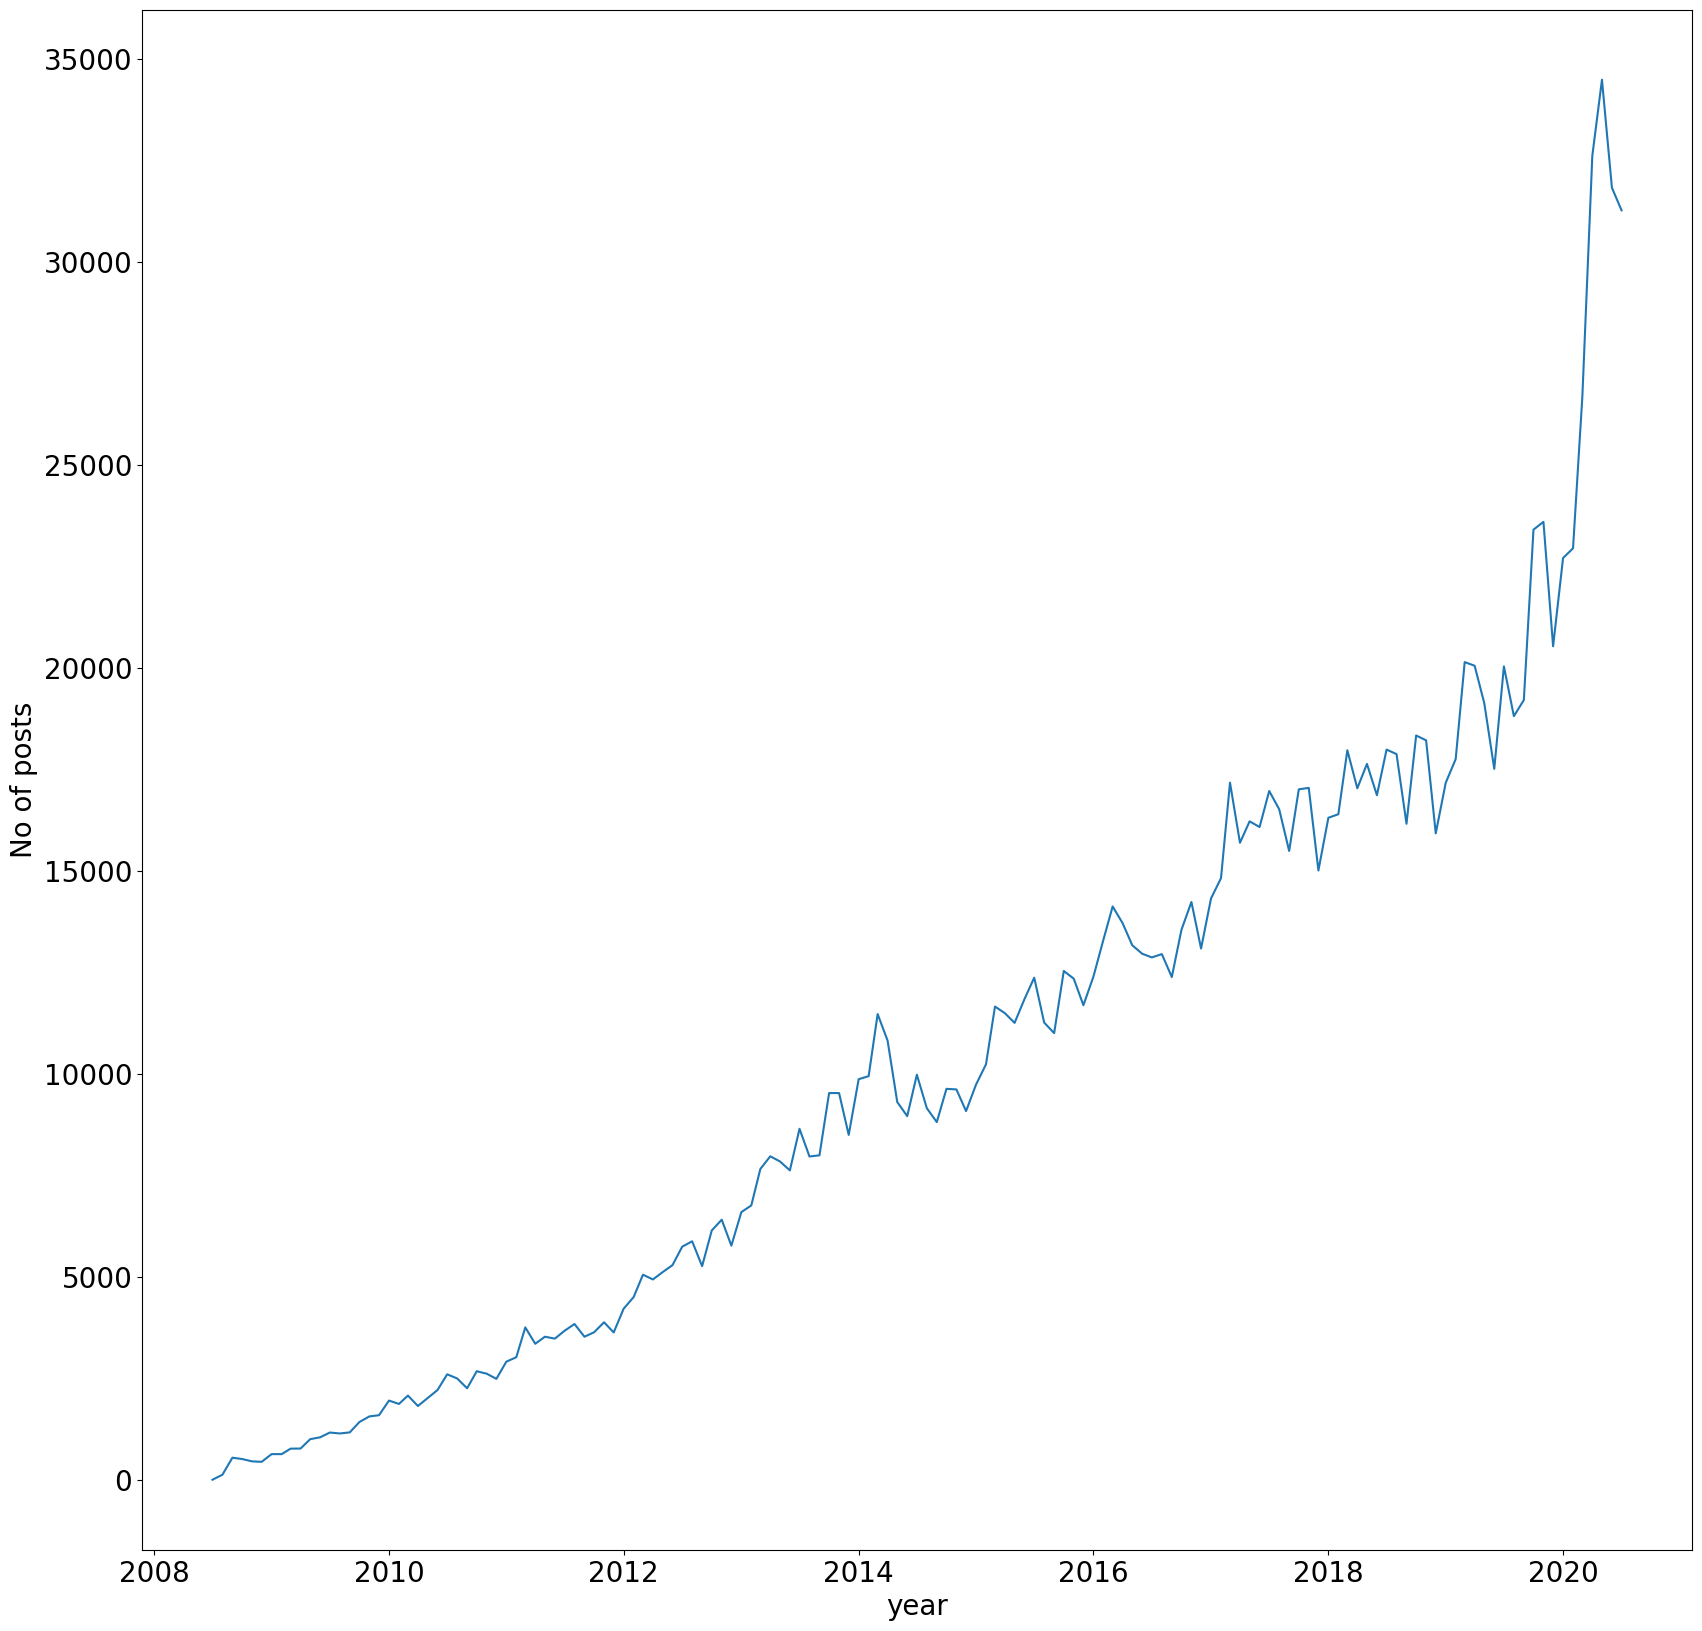

In [100]:
# we can use fig size to adjust the size of the graph
plt.figure(figsize=(20,20))
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.ylabel(ylabel="No of posts",fontsize = 20)
plt.xlabel(xlabel='year',fontsize= 20)
plt.plot(rotate.index,rotate['python'])
plt.show()

.figure() - allows us to resize our chart

.xticks() - configures our x-axis

.yticks() - configures our y-axis

.xlabel() - add text to the x-axis

.ylabel() - add text to the y-axis

.ylim() - allows us to set a lower and upper bound



**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


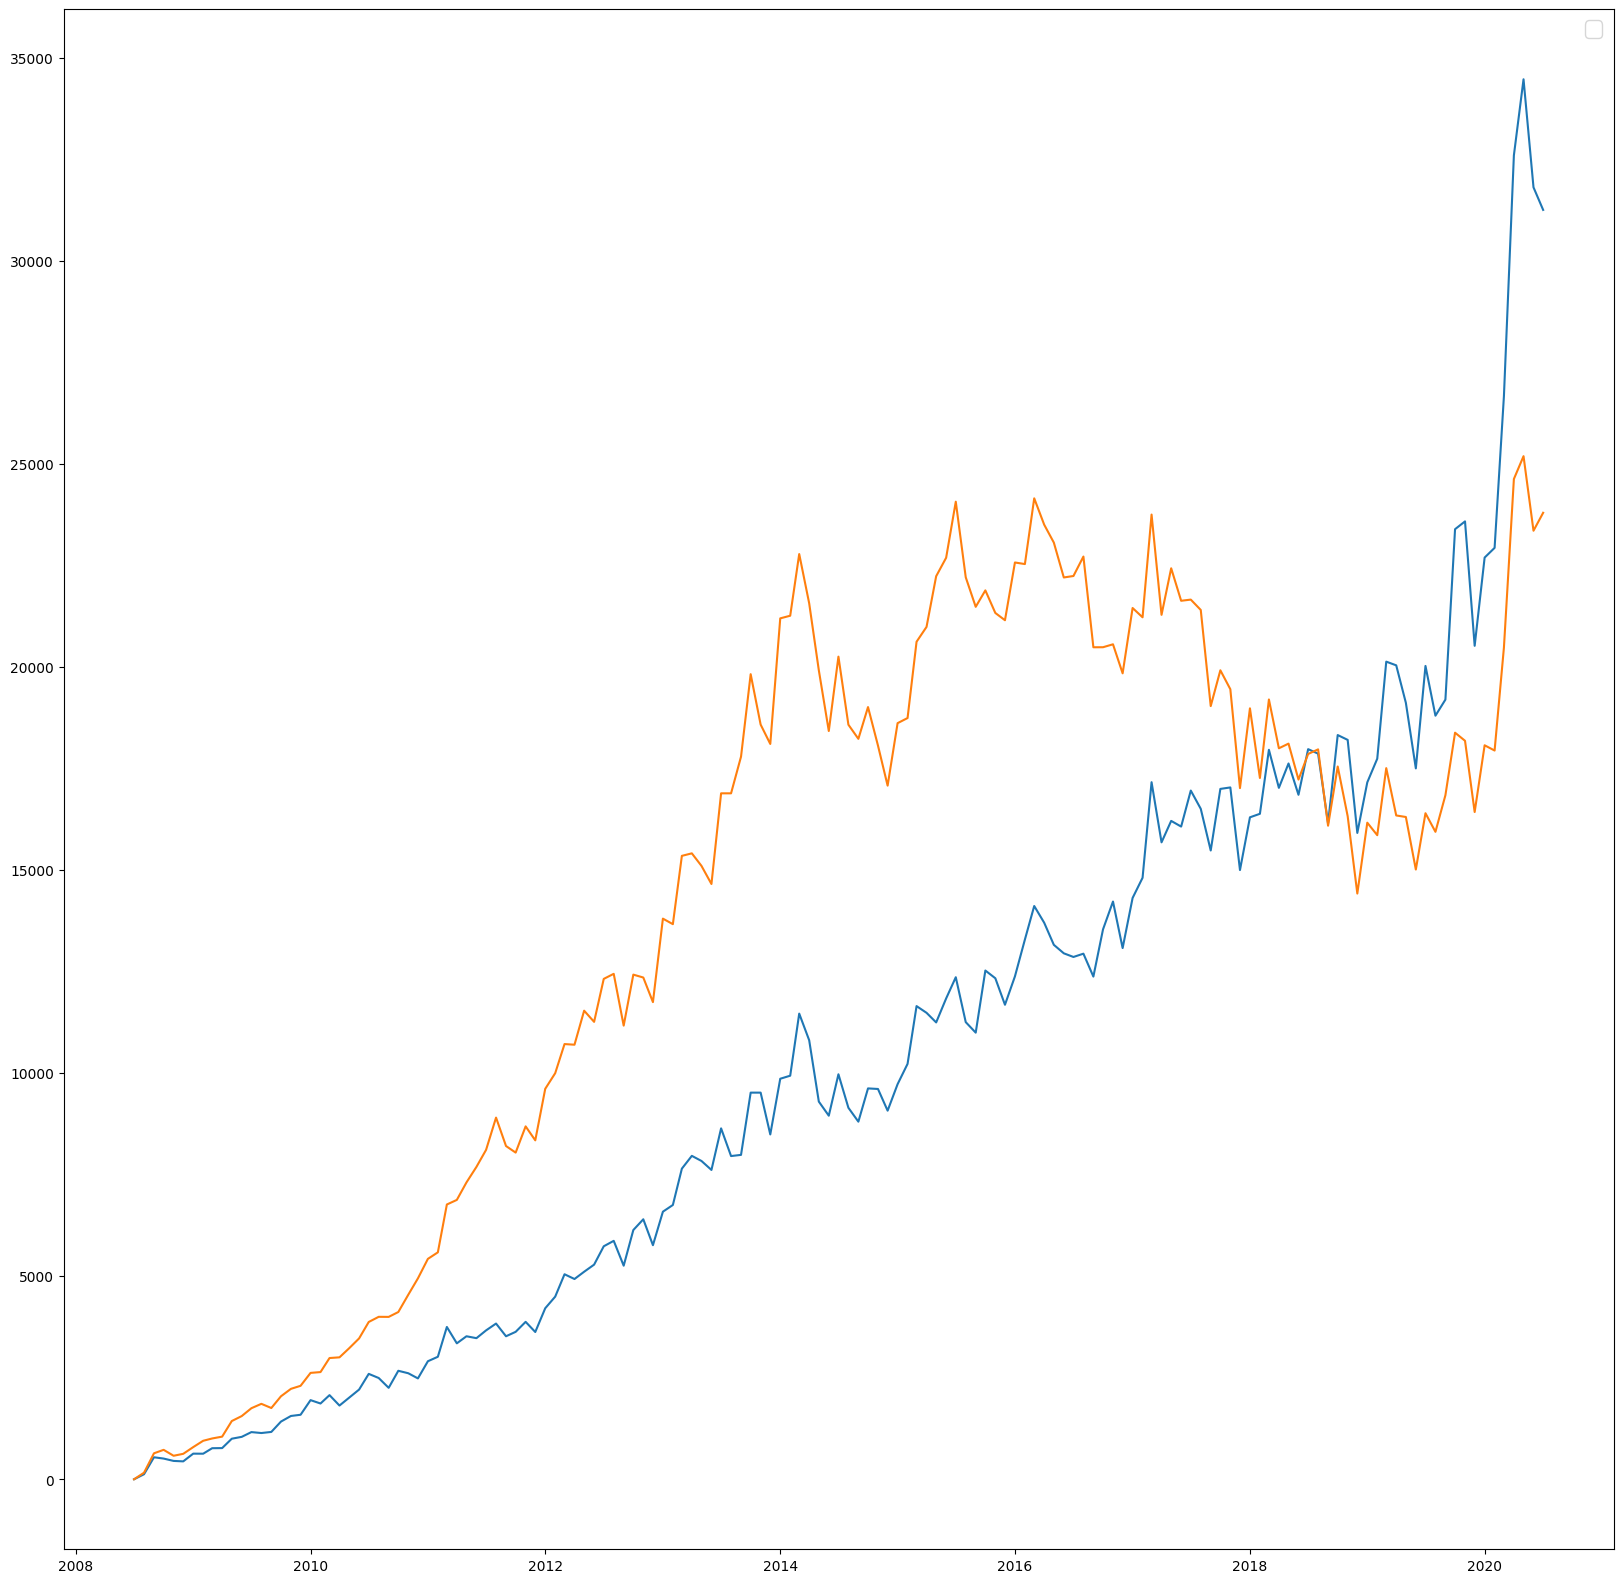

In [104]:
plt.figure(figsize=(20,20))
plt.plot(rotate.index, rotate.python) # Tadah!
plt.plot(rotate.index, rotate.javascript)
plt.legend(fontsize = 16)

# Plotting all colums and their respective trendings 

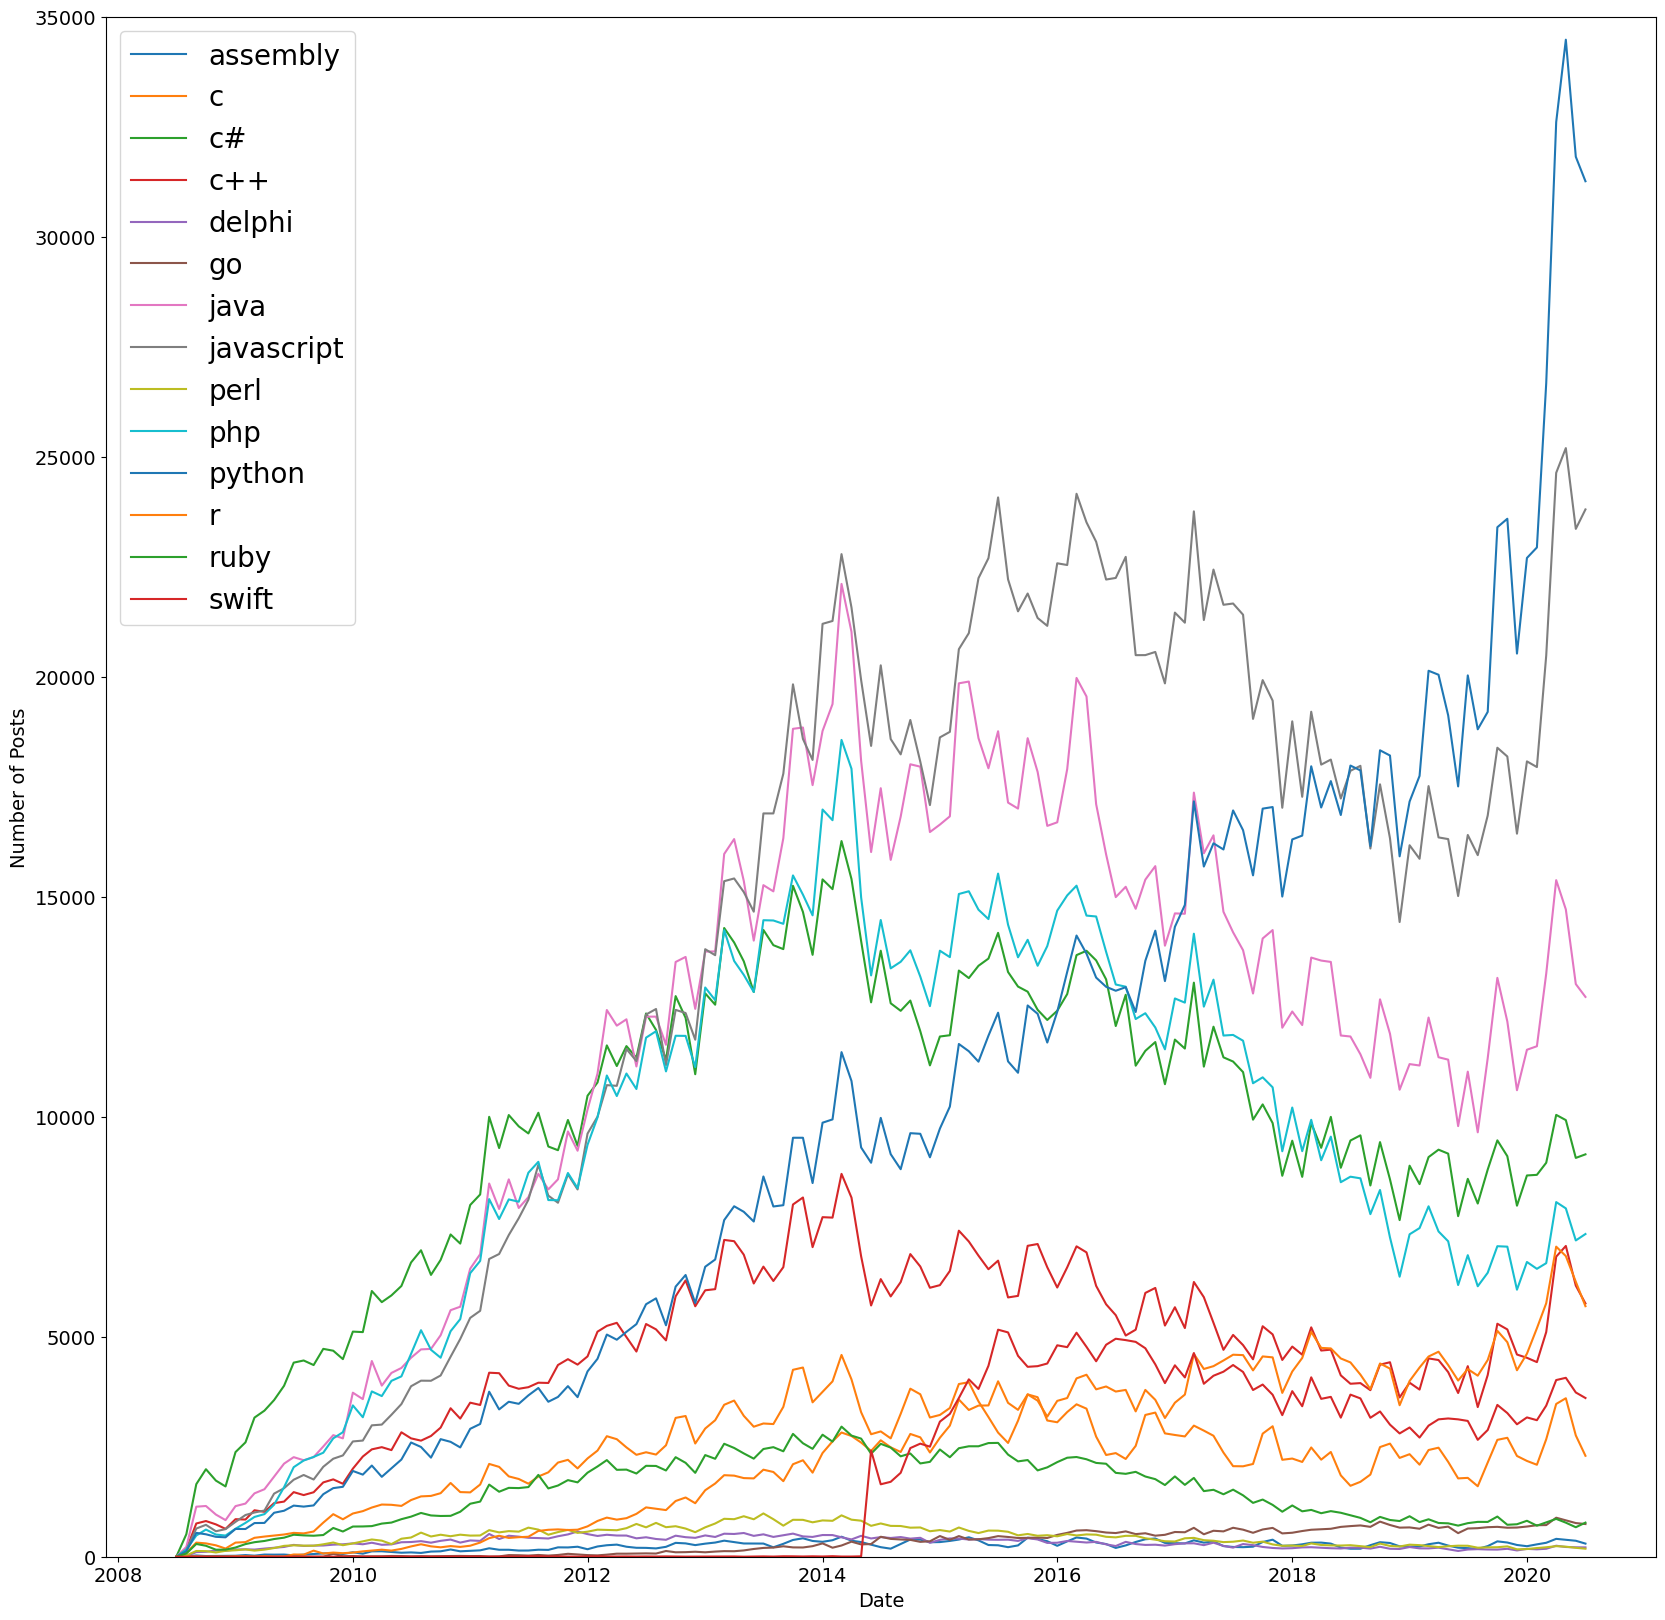

In [120]:
plt.figure(figsize=(20,20))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
i = 0
for test in rotate.columns:
    plt.plot(rotate.index, rotate[test],label =rotate.columns.values.tolist()[i])
    i+=1
plt.legend(fontsize = 20)    

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 

In [131]:
rol_df = rotate.rolling(15).mean()

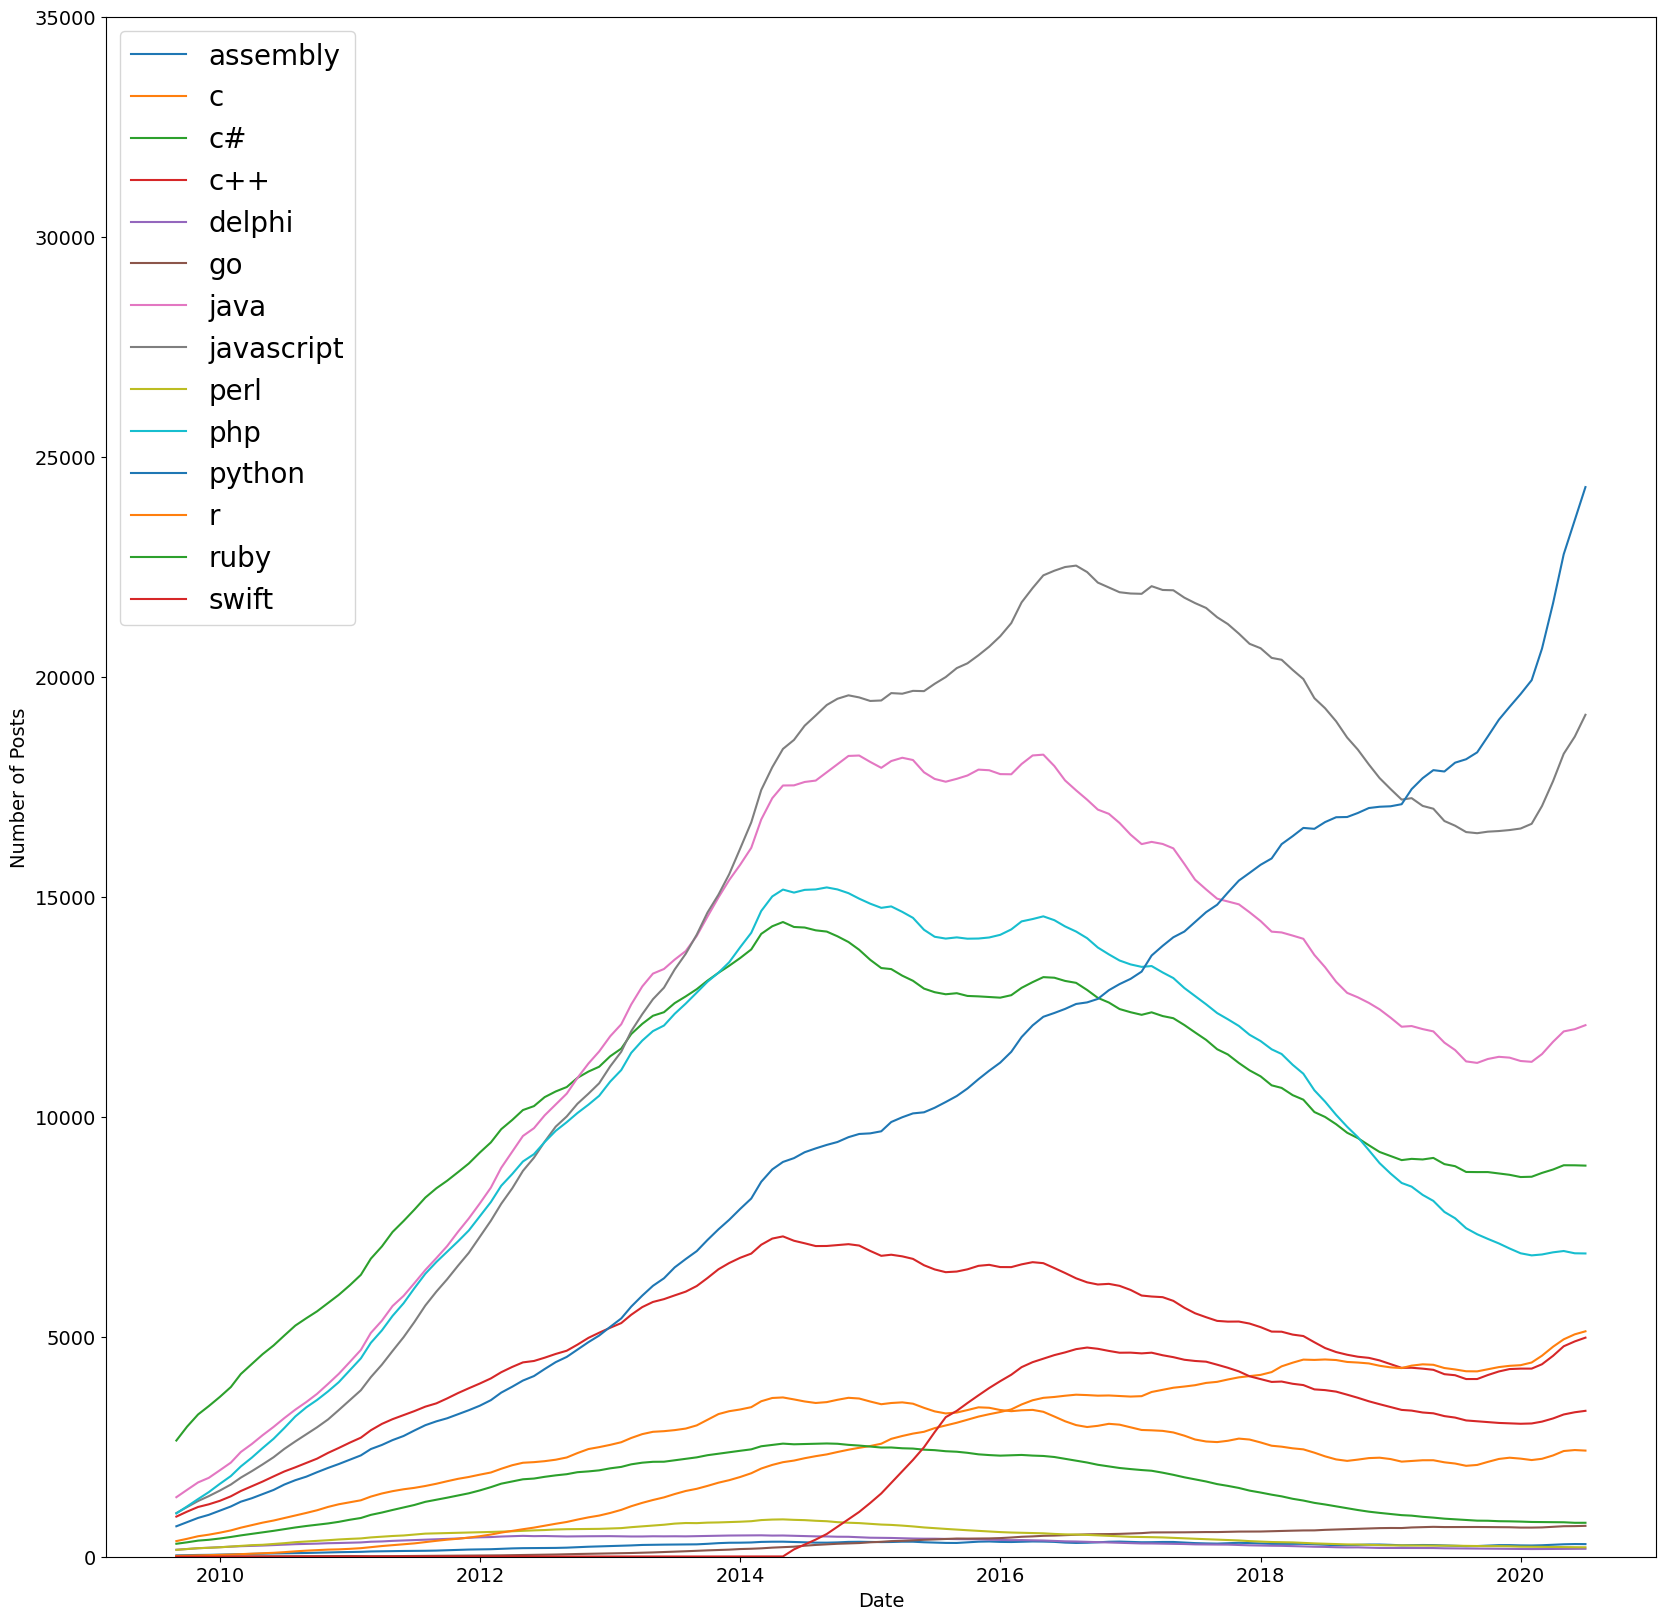

In [132]:
plt.figure(figsize=(20,20))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
i = 0
for test in rol_df.columns:
    plt.plot(rol_df.index, rol_df[test],label =rol_df.columns.values.tolist()[i])
    i+=1
plt.legend(fontsize = 20)    

#  this concludes the manipulation